In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [9]:
df_raw = pd.read_csv('King_County_House_prices_dataset.csv')

In [91]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 24 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
lat_long         21597 non-null object
bin_lat          21597 non-null cate

### Location 

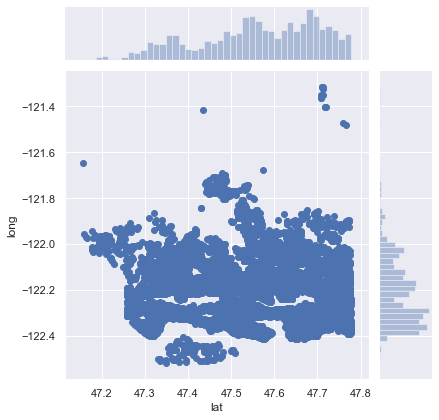

In [6]:
sns.jointplot(x='lat',y='long',data=df_raw,kind='scatter')

#### create a raster

In [ ]:
df_raw.groupby

In [10]:
df_raw['lat_long'] = list(zip(df_raw.lat, df_raw.long))

In [13]:
df_raw['lat_long'].head()

0               (47.5112, -122.257)
1    (47.721000000000004, -122.319)
2    (47.7379, -122.23299999999999)
3    (47.5208, -122.39299999999999)
4               (47.6168, -122.045)
Name: lat_long, dtype: object

In [31]:
bin_lat = pd.cut(df_raw.lat,10)
bin_long = pd.cut(df_raw.long,10)

In [34]:
df_raw['bin_lat'] = bin_lat
df_raw['bin_long'] = bin_long

In [35]:
df_mprice = df_raw.groupby(['bin_lat','bin_long']).mean()['price']

In [36]:
df_mprice.head()

bin_lat           bin_long            
(47.155, 47.218]  (-122.52, -122.399]               NaN
                  (-122.399, -122.278]              NaN
                  (-122.278, -122.158]              NaN
                  (-122.158, -122.037]    344000.000000
                  (-122.037, -121.917]    281685.325843
Name: price, dtype: float64

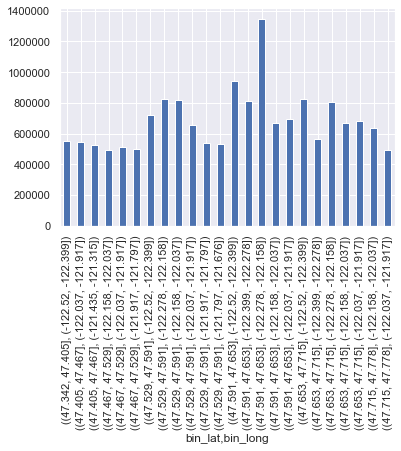

In [37]:
df_mprice[df_mprice> df_mprice.mean()].plot.bar()

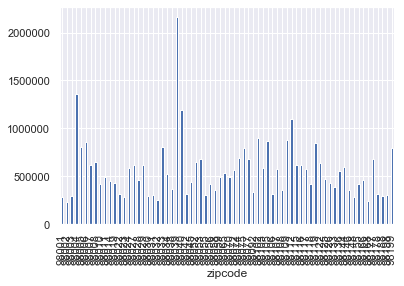

In [39]:
### try by Zip
df_raw.groupby('zipcode').mean()['price'].plot.bar()

In [46]:
df_minZip = pd.DataFrame()
zipcodeGroup = df_raw.groupby(['bin_lat','bin_long'])
df_minZip['zipmin'] = zipcodeGroup.min()['zipcode']
df_minZip['zipmax'] = zipcodeGroup.max()['zipcode']
df_minZip['zipd'] = df_minZip['zipmax'] - df_minZip['zipmin']

In [53]:
df_minZip.head(50)

zipmin   zipmax   zipd
bin_lat          bin_long                                     
(47.155, 47.218] (-122.52, -122.399]       NaN      NaN    NaN
                 (-122.399, -122.278]      NaN      NaN    NaN
                 (-122.278, -122.158]      NaN      NaN    NaN
                 (-122.158, -122.037]  98022.0  98022.0    0.0
                 (-122.037, -121.917]  98022.0  98022.0    0.0
                 (-121.917, -121.797]      NaN      NaN    NaN
                 (-121.797, -121.676]      NaN      NaN    NaN
                 (-121.676, -121.556]  98022.0  98022.0    0.0
                 (-121.556, -121.435]      NaN      NaN    NaN
                 (-121.435, -121.315]      NaN      NaN    NaN
(47.218, 47.28]  (-122.52, -122.399]       NaN      NaN    NaN
                 (-122.399, -122.278]  98001.0  98023.0   22.0
                 (-122.278, -122.158]  98001.0  98092.0   91.0
                 (-122.158, -122.037]  98022.0  98092.0   70.0
                 (-122.037, -121.917]  98022.0  98022.0    0.0
                 (-121.917, -121.797]  98022.0  98022.0    0.0
                 (-121.797, -121.676]      NaN      NaN    NaN
                 (-121.676, -121.556]      NaN      NaN    NaN
                 (-121.556, -121.435]      NaN      NaN    NaN
                 (-121.435, -121.315]      NaN      NaN    NaN
(47.28, 47.342]  (-122.52, -122.399]   98023.0  98070.0   47.0
                 (-122.399, -122.278]  98001.0  98023.0   22.0
                 (-122.278, -122.158]  98001.0  98092.0   91.0
                 (-122.158, -122.037]  98002.0  98092.0   90.0
                 (-122.037, -121.917]  98010.0  98092.0   82.0
                 (-121.917, -121.797]  98010.0  98010.0    0.0
                 (-121.797, -121.676]      NaN      NaN    NaN
                 (-121.676, -121.556]      NaN      NaN    NaN
                 (-121.556, -121.435]      NaN      NaN    NaN
                 (-121.435, -121.315]      NaN      NaN    NaN
(47.342, 47.405] (-122.52, -122.399]   98070.0  98070.0    0.0
                 (-122.399, -122.278]  98001.0  98198.0  197.0
                 (-122.278, -122.158]  98001.0  98092.0   91.0
                 (-122.158, -122.037]  98010.0  98058.0   48.0
                 (-122.037, -121.917]  98010.0  98038.0   28.0
                 (-121.917, -121.797]      NaN      NaN    NaN
                 (-121.797, -121.676]      NaN      NaN    NaN
                 (-121.676, -121.556]      NaN      NaN    NaN
                 (-121.556, -121.435]      NaN      NaN    NaN
                 (-121.435, -121.315]      NaN      NaN    NaN
(47.405, 47.467] (-122.52, -122.399]   98070.0  98070.0    0.0
                 (-122.399, -122.278]  98148.0  98198.0   50.0
                 (-122.278, -122.158]  98031.0  98188.0  157.0
                 (-122.158, -122.037]  98038.0  98059.0   21.0
                 (-122.037, -121.917]  98027.0  98038.0   11.0
                 (-121.917, -121.797]  98045.0  98045.0    0.0
                 (-121.797, -121.676]  98045.0  98045.0    0.0
                 (-121.676, -121.556]      NaN      NaN    NaN
                 (-121.556, -121.435]      NaN      NaN    NaN
                 (-121.435, -121.315]  98045.0  98045.0    0.0

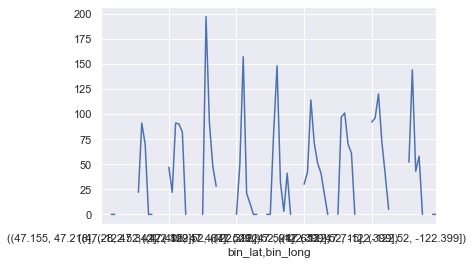

In [52]:
df_minZip.zipd.plot() # raster is okisch‚

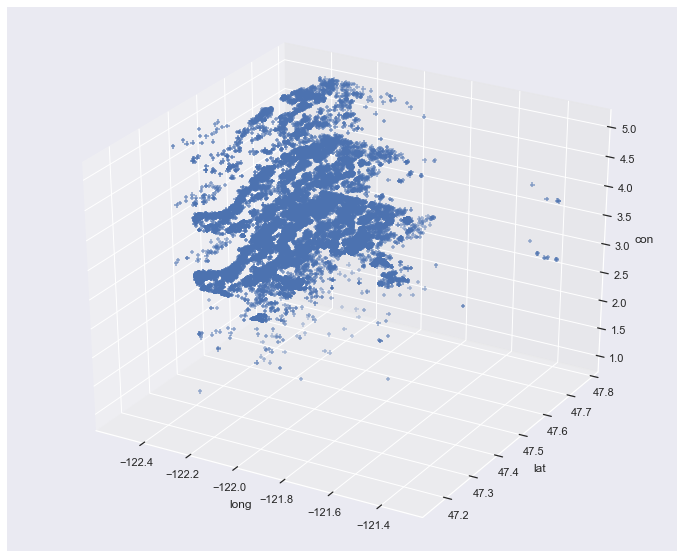

In [63]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(df_raw.long, df_raw.lat, df_raw.price/100000, marker='o' )
ax.scatter(df_raw.long, df_raw.lat, df_raw.condition, marker='+')
ax.set_xlabel('long')
ax.set_ylabel('lat')
ax.set_zlabel('con')

plt.show()

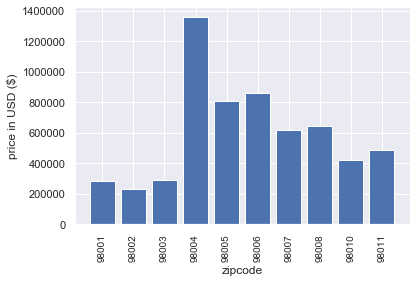

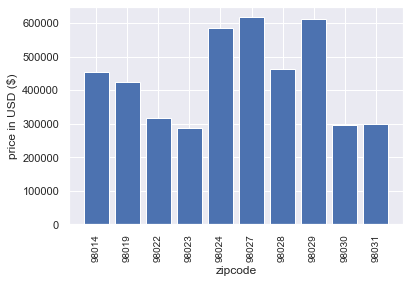

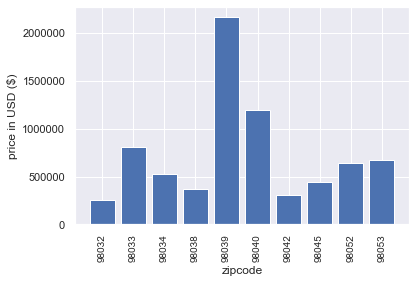

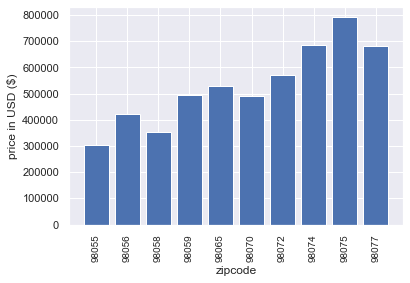

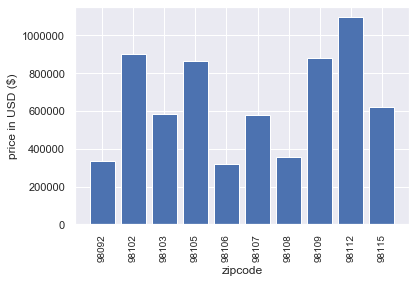

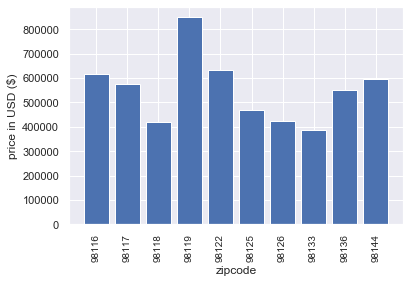

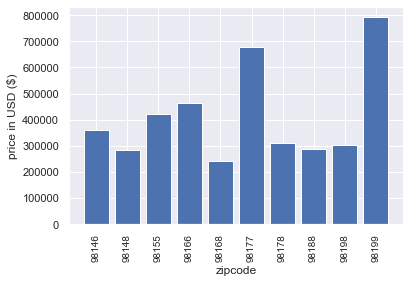

In [90]:
import matplotlib.pyplot as plt

keys = [zipcode for zipcode, df in df_raw.groupby(['zipcode'])]
keys = [str(z) for z in keys]
li = 0
for i in np.linspace(10,70,7):
    
    ii = int(i)
    plt.bar(keys[li:ii],df_raw.groupby(['zipcode']).mean()['price'][li:ii])
    plt.ylabel('price in USD ($)')
    plt.xlabel('zipcode')
    plt.xticks(keys[li:ii], rotation='vertical', size=10)
    plt.show()
    li = ii

In [72]:
range(0,len(keys),20)

range(0, 70, 20)

In [77]:
np.linspace(10,70,7)

array([10.        , 14.61538462, 19.23076923, 23.84615385, 28.46153846,
       33.07692308, 37.69230769, 42.30769231, 46.92307692, 51.53846154,
       56.15384615, 60.76923077, 65.38461538, 70.        ])